In [1]:
import pandas as pd

In [2]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,2Pac,Cardi B,Eminem,J. Cole,Joyner Lucas,Juice WRLD,Kanye West,Lil Pump,Logic,Mac Miller,Nas,Nicki Minaj,Notorious B.I.G.
aa,0,0,1,0,0,0,1,0,1,0,0,0,0
aaaaaaaaaa,0,0,0,0,0,0,0,0,0,0,0,1,0
aaaaaaack,0,0,1,0,0,0,0,0,0,0,0,0,0
aaaaah,0,0,0,0,0,0,0,0,0,0,0,1,0
aaaaahhh,0,0,0,0,0,0,1,0,0,0,0,0,0


## Most common words

In [3]:
top_30_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_30_dict[c] = list(zip(top.index, top.values))
    
top_30_dict

{'2Pac': [('im', 2529),
  ('niggas', 1692),
  ('nigga', 1624),
  ('got', 1549),
  ('like', 1380),
  ('dont', 1322),
  ('aint', 1183),
  ('cause', 1059),
  ('know', 1051),
  ('life', 907),
  ('just', 814),
  ('fuck', 794),
  ('shit', 745),
  ('time', 743),
  ('love', 712),
  ('ya', 711),
  ('thug', 678),
  ('die', 639),
  ('let', 591),
  ('thats', 588),
  ('yeah', 580),
  ('baby', 556),
  ('wanna', 539),
  ('make', 505),
  ('em', 499),
  ('way', 461),
  ('come', 453),
  ('man', 450),
  ('bitch', 439),
  ('tell', 427)],
 'Cardi B': [('like', 373),
  ('im', 340),
  ('bitch', 292),
  ('dont', 244),
  ('got', 161),
  ('know', 151),
  ('cardi', 147),
  ('money', 141),
  ('bag', 141),
  ('yeah', 133),
  ('trick', 130),
  ('shit', 124),
  ('just', 117),
  ('bitches', 109),
  ('fuck', 108),
  ('aint', 107),
  ('nigga', 105),
  ('want', 95),
  ('niggas', 91),
  ('ass', 89),
  ('pussy', 85),
  ('gon', 85),
  ('bad', 81),
  ('woo', 79),
  ('drip', 79),
  ('make', 79),
  ('look', 77),
  ('thats', 6

In [4]:
# top 15 words for each rapper
for rapper, top_words in top_30_dict.items():
    print(rapper)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('===============================================================')

2Pac
im, niggas, nigga, got, like, dont, aint, cause, know, life, just, fuck, shit, time
Cardi B
like, im, bitch, dont, got, know, cardi, money, bag, yeah, trick, shit, just, bitches
Eminem
im, like, just, dont, cause, got, shit, aint, know, fuck, youre, yeah, say, em
J. Cole
im, nigga, like, niggas, got, aint, know, dont, shit, yeah, just, man, cause, love
Joyner Lucas
im, dont, just, got, like, aint, yeah, know, nigga, shit, fuck, love, need, wanna
Juice WRLD
im, yeah, like, dont, bitch, got, uh, know, fuck, love, aint, just, oh, shit
Kanye West
im, like, know, dont, got, just, yeah, aint, oh, love, shit, thats, nigga, need
Lil Pump
ooh, yeah, bitch, im, like, got, gucci, huh, dont, fuck, brr, chyeah, lil, wanna
Logic
im, like, know, yeah, just, shit, dont, got, aint, fuck, man, cause, uh, thats
Mac Miller
im, yeah, like, just, dont, got, know, aint, shit, love, fuck, life, cause, time
Nas
im, niggas, like, got, know, nigga, dont, cause, man, shit, nas, just, love, aint
Nicki Minaj
i

In [5]:
from collections import Counter
words = []
for rapper in data.columns:
    top = [word for (word, count) in top_30_dict[rapper]]
    for t in top:
        words.append(t)
        
Counter(words).most_common()

[('im', 13),
 ('got', 13),
 ('like', 13),
 ('dont', 13),
 ('know', 13),
 ('just', 13),
 ('fuck', 13),
 ('shit', 13),
 ('yeah', 13),
 ('aint', 12),
 ('thats', 12),
 ('make', 12),
 ('bitch', 12),
 ('love', 11),
 ('wanna', 11),
 ('cause', 10),
 ('niggas', 9),
 ('nigga', 9),
 ('time', 8),
 ('em', 8),
 ('man', 8),
 ('want', 8),
 ('let', 7),
 ('come', 7),
 ('life', 6),
 ('oh', 6),
 ('right', 6),
 ('way', 5),
 ('money', 5),
 ('gon', 5),
 ('need', 5),
 ('say', 5),
 ('uh', 5),
 ('tell', 4),
 ('feel', 3),
 ('ya', 2),
 ('die', 2),
 ('bitches', 2),
 ('look', 2),
 ('think', 2),
 ('hey', 2),
 ('la', 2),
 ('ayy', 2),
 ('huh', 2),
 ('yo', 2),
 ('thug', 1),
 ('baby', 1),
 ('cardi', 1),
 ('bag', 1),
 ('trick', 1),
 ('ass', 1),
 ('pussy', 1),
 ('bad', 1),
 ('woo', 1),
 ('drip', 1),
 ('youre', 1),
 ('ill', 1),
 ('fuckin', 1),
 ('little', 1),
 ('shady', 1),
 ('said', 1),
 ('girl', 1),
 ('buck', 1),
 ('told', 1),
 ('ima', 1),
 ('uhhuh', 1),
 ('woah', 1),
 ('run', 1),
 ('ooh', 1),
 ('gucci', 1),
 ('brr', 1),

In [6]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['im',
 'got',
 'like',
 'dont',
 'know',
 'just',
 'fuck',
 'shit',
 'yeah',
 'aint',
 'thats',
 'make',
 'bitch',
 'love',
 'wanna',
 'cause',
 'niggas',
 'nigga',
 'time',
 'em',
 'man',
 'want',
 'let',
 'come']

In [7]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('data_clean.pkl')

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.lyrics)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

import pickle
pickle.dump(cv, open('cv_stop.pkl', 'wb'))
data_stop.to_pickle('dtm_stop.pkl')

In [8]:
from wordcloud import WordCloud

wc_no_stopwords = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
              max_font_size=150, random_state=43)

## Wordcloud without stop words

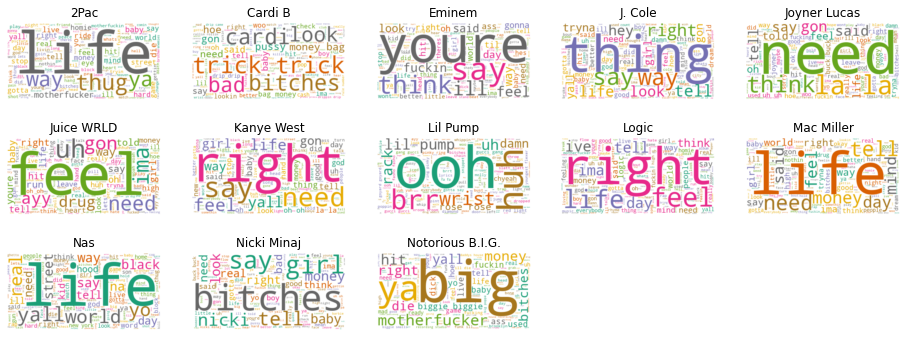

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

rappers = list(data.columns.values)

for i, rapper in enumerate(data.columns):
    wc_no_stopwords.generate(data_clean.lyrics[rapper])
    
    plt.subplot(3, 5, i+1)
    plt.imshow(wc_no_stopwords, interpolation="bilinear")
    plt.axis("off")
    plt.title(rappers[i])
    
plt.show()

## Wordcloud with some stop words

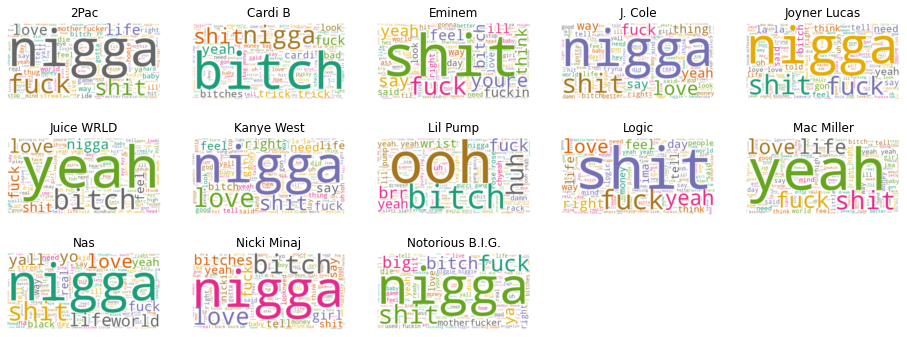

In [10]:
add_stop_words2 = list(set(add_stop_words) - set(['fuck', 'shit', 'yeah', 'bitch', 'love', 'niggas', 'nigga']))
stop_words2 = text.ENGLISH_STOP_WORDS.union(add_stop_words2)
wc_w_stopwords = WordCloud(stopwords=stop_words2, background_color="white", colormap="Dark2",
              max_font_size=150, random_state=43)

for index, rapper in enumerate(data.columns):
    wc_w_stopwords.generate(data_clean.lyrics[rapper])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc_w_stopwords, interpolation="bilinear")
    plt.axis("off")
    plt.title(rappers[index])
    
plt.show()

In [11]:
## Number of Words
unique_list = []
for rapper in data.columns:
    uniques = data[rapper].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    
data_words = pd.DataFrame(list(zip(rappers, unique_list)), columns=['rapper', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,rapper,unique_words
7,Lil Pump,1822
1,Cardi B,2414
4,Joyner Lucas,4392
3,J. Cole,6533
12,Notorious B.I.G.,6685
5,Juice WRLD,8127
8,Logic,8307
11,Nicki Minaj,8374
0,2Pac,9777
9,Mac Miller,9870


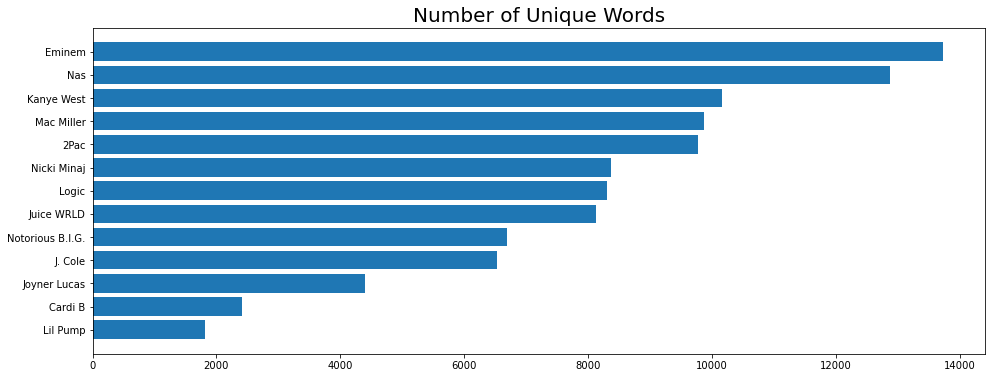

In [12]:
import numpy as np

y = np.arange(len(data_words))

plt.plot(1, 2, 1)
plt.barh(y, data_unique_sort.unique_words, align='center')
plt.yticks(y, data_unique_sort.rapper)
plt.title('Number of Unique Words', fontsize=20)
plt.show()

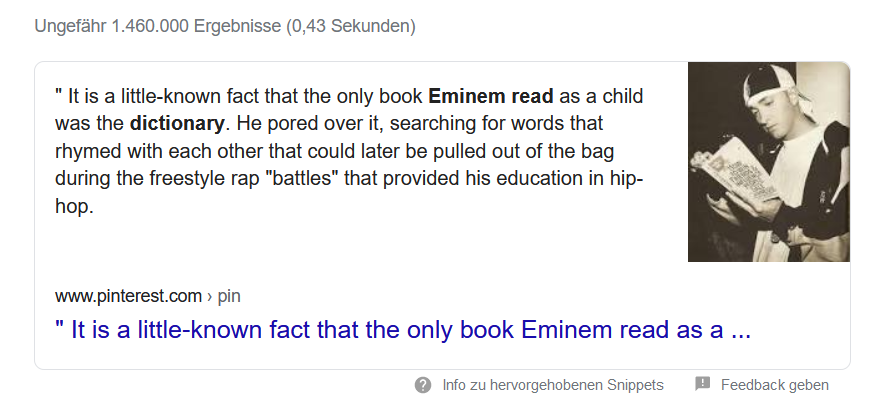

In [13]:
from IPython.display import Image
Image(filename='eminem dictionary.PNG', width=500)

## Profanity

In [14]:
swear_words = data.transpose()[['fuck', 'shit', 'bitch']]
swear_words_df = pd.concat([swear_words.fuck, swear_words.shit,
                            swear_words.bitch], axis=1)
swear_words_df.columns = ['f_word', 's_word', 'b_word']
swear_words_df

,f_word,s_word,b_word
2Pac,794,745,439
Cardi B,108,124,292
Eminem,773,899,430
J. Cole,309,715,243
Joyner Lucas,303,304,163
Juice WRLD,1425,1002,1902
Kanye West,441,619,378
Lil Pump,130,74,353
Logic,560,867,295
Mac Miller,589,812,441


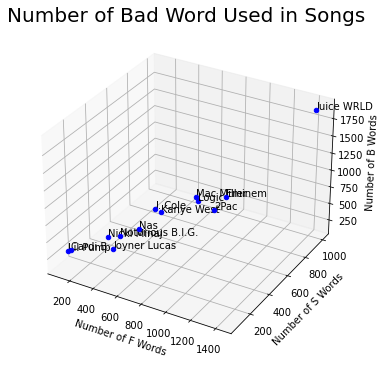

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, rapper in enumerate(swear_words_df.index):
    x = swear_words_df.f_word.loc[rapper]
    y = swear_words_df.s_word.loc[rapper]
    z = swear_words_df.b_word.loc[rapper]
    ax.scatter(x, y, z, color='blue')
    ax.text(x+1.5, y+0.5, z+0.5,rappers[i], fontsize=10)
    
plt.title('Number of Bad Word Used in Songs', fontsize=20)
ax.set_xlabel('Number of F Words')
ax.set_ylabel('Number of S Words')
ax.set_zlabel('Number of B Words')

plt.show()

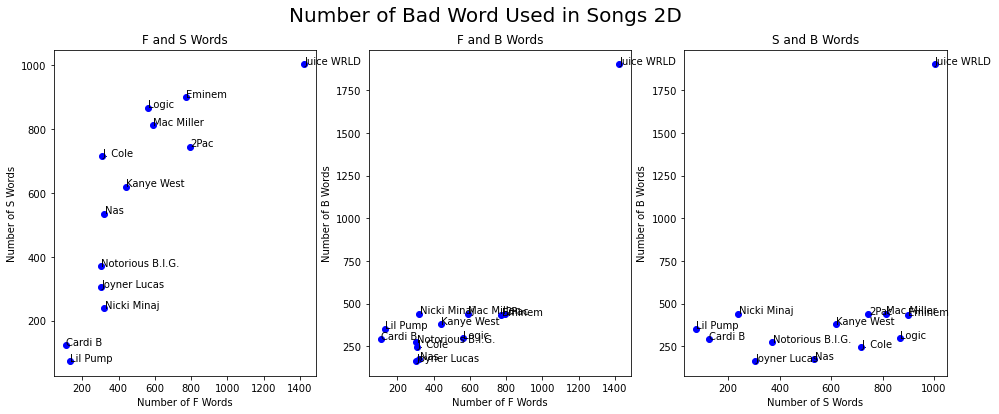

In [16]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3)
fig.suptitle('Number of Bad Word Used in Songs 2D', fontsize=20)
fig.subplots_adjust(hspace = 1)
for i, rapper in enumerate(swear_words_df.index):
    f_words = swear_words_df.f_word.loc[rapper]
    s_words = swear_words_df.s_word.loc[rapper]
    b_words = swear_words_df.b_word.loc[rapper]
    
    axs1.scatter(f_words, s_words, color='blue')
    axs1.text(f_words+1.5, s_words+0.5, rappers[i], fontsize=10)
    axs1.set(xlabel='Number of F Words', ylabel='Number of S Words')
    axs1.set_title('F and S Words')
    
    axs2.scatter(f_words, b_words, color='blue')
    axs2.text(f_words+1.5, b_words+0.5, rappers[i], fontsize=10)
    axs2.set(xlabel='Number of F Words', ylabel='Number of B Words')
    axs2.set_title('F and B Words')
    
    axs3.scatter(s_words, b_words, color='blue')
    axs3.text(s_words+1.5, b_words+0.5, rappers[i], fontsize=10)
    axs3.set(xlabel='Number of S Words', ylabel='Number of B Words')
    axs3.set_title('S and B Words')

plt.show()